# 極小場地定位Code

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

from csidataset import *
import data_loader
from data_loader import *
sys.path.append("/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool")
import denoise
from model import *

In [6]:
base_path = "/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv"

In [8]:
reference_points = {
    f"{base_path}/reference_point{i}.xlsx": i for i in range(1, 37)
}

# 確認字典內容
print(reference_points)


{'/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point1.xlsx': 1, '/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point2.xlsx': 2, '/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point3.xlsx': 3, '/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point4.xlsx': 4, '/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point5.xlsx': 5, '/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point6.xlsx': 6, '/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/localization_phone/micro/0309/20MHz/csv/reference_point7.xlsx': 7, '/med

In [12]:
def load_data(reference_points):
    data = []          
    rp_labels = []     

    for path, ref_id in reference_points.items():
        df = pd.read_excel(path,  header=None)
        data.append(df.values)
        rp_labels.extend([ref_id] * len(df))  # 只保留 Reference Point ID

    data = pd.DataFrame(np.vstack(data))
    rp_labels = pd.Series(rp_labels, name="Reference Point ID")  # 轉為 Pandas Series

    return data, rp_labels


In [13]:
data, rp_labels = load_data(reference_points)


In [62]:
import pandas as pd
import numpy as np

# 假設你資料都已對齊
df = pd.DataFrame(amp_data, columns=[f"Subcarrier_{i}" for i in range(48)])
df["Label"] = rp_labels

# (可選) 確認 shape
assert len(df) == len(amp_data) == len(rp_labels)

# 存檔
df.to_csv("/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/csi_dataset/mirco/data_mirco_5g.csv", index=False)


In [14]:

print(data.shape)       # 顯示數據
print(rp_labels.shape)  # 顯示 Reference Point ID


(18000, 98)
(18000,)


In [15]:
amp_data = np.array(data.iloc[:, :48])
#phase_data = np.array(data.iloc[:, 234:-2])  

In [61]:
amp_data 

array([[478.09308717, 475.41350423, 477.34683407, ..., 629.1526047 ,
        647.38010473, 645.97523172],
       [541.9418788 , 547.1754746 , 535.27002531, ..., 719.89026942,
        750.05133158, 741.6070388 ],
       [530.92466509, 539.07049632, 521.19861857, ..., 709.7337529 ,
        732.91200017, 747.60216693],
       ...,
       [516.557838  , 498.74442353, 517.23205624, ..., 498.1977519 ,
        528.16096031, 517.54903149],
       [637.95297632, 656.47924567, 640.15779305, ..., 668.41454203,
        698.73313933, 678.89468992],
       [509.08250805, 511.5193056 , 504.8098652 , ..., 527.07969037,
        545.2017975 , 536.8239935 ]])

In [ ]:
#amp_d = denoise.preprocess_csi_for_fingerprint2(amp_data)
#phase_d = denoise.preprocess_csi_for_fingerprint2(phase_data)

#amp_phase_d = np.concatenate((amp_d, phase_d), axis=1)

In [16]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = encoder.fit_transform(np.array(rp_labels).reshape(-1, 1))

In [18]:
print(amp_data.shape)
#print(phase_data.shape)
print(one_hot_labels.shape)

(18000, 48)
(18000, 36)


In [20]:
amp_train, amp_temp, y_train, y_temp = train_test_split(amp_data, one_hot_labels, test_size=0.3, random_state=42)
amp_val, amp_test, y_val, y_test = train_test_split(amp_temp, y_temp, test_size=1/3, random_state=42)

In [22]:
amp_test.shape

(1800, 48)

In [29]:
data

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,478.093087,475.413504,477.346834,473.240953,484.784488,511.806604,542.551380,546.703759,566.869474,578.428907,...,-2.037161,-2.267258,-2.473051,-2.923957,3.075235,2.796217,2.455754,2.092631,-57.0,136.0
1,541.941879,547.175475,535.270025,531.448022,549.422424,590.742753,606.486603,625.542964,634.483254,649.458236,...,1.439862,1.131304,0.805151,0.093564,-0.272269,-0.659338,-1.045697,-1.530333,-56.0,136.0
2,530.924665,539.070496,521.198619,525.457896,530.023584,586.637878,611.117828,607.487448,624.135402,648.057096,...,-0.785398,-0.903270,-1.033560,-1.337771,-1.510611,-1.727838,-1.930525,-2.216705,-56.0,136.0
3,536.631158,536.269522,524.824733,522.345671,541.956640,606.923389,627.347591,621.559329,628.160011,653.416406,...,0.618493,0.400479,0.177905,-0.312534,-0.598948,-0.889106,-1.210916,-1.574940,-56.0,136.0
4,523.083167,538.817223,517.707446,533.985019,545.212802,598.564951,607.646279,608.823456,617.402624,645.261187,...,-1.866954,-2.224387,-2.543882,3.012445,2.616861,2.231103,1.825637,1.338379,-56.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,506.269691,489.123706,544.499770,532.744779,513.460807,532.573000,522.245153,536.455963,540.120357,540.473866,...,-2.730802,3.084223,2.586150,1.598212,1.078195,0.524205,-0.044287,-0.656179,-63.0,136.0
17996,531.760284,528.379598,531.048962,532.170086,510.216621,511.789019,524.960951,543.341513,551.762630,548.241735,...,-0.903180,-1.306342,-1.693828,-2.471364,-2.877916,2.976444,2.503632,1.979583,-63.0,136.0
17997,516.557838,498.744424,517.232056,506.122515,523.811035,539.648033,556.863538,551.616715,553.176283,550.542460,...,1.048783,0.730561,0.397282,-0.352335,-0.739912,-1.104456,-1.504480,-1.959196,-63.0,136.0
17998,637.952976,656.479246,640.157793,665.520097,663.319682,673.856068,659.555153,679.100876,682.833069,701.576083,...,0.984590,0.806033,0.632466,0.244631,0.049958,-0.185072,-0.440604,-0.770816,-64.0,136.0


In [ ]:
amp_test, y_test

In [23]:
batch_size = 32

train_dataset = CSIDataset(amp_train, y_train)
val_dataset = CSIDataset(amp_val, y_val)
test_dataset = CSIDataset(amp_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class CNNClassifier(nn.Module):
    def __init__(self, num_classes=36):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.flatten_dim = self._get_flatten_dim()
        #self.flatten_dim = 7424  # 48 -> 24 -> 12 after pooling

        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, num_classes)

    def _get_flatten_dim(self):
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 48)  # Simulate a batch of 1 input
            dummy_output = self._forward_features(dummy_input)
            return dummy_output.numel()  # Compute total number of features

    def _forward_features(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        return x


    def forward(self, x):
        # Ensure input is in the shape (batch_size, channels, length)
        if x.dim() == 2:
            x = x.unsqueeze(1)

        if x.shape[1] != 1:
            x = x.permute(0, 2, 1)  # (batch_size, 1, 48)

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = x.view(x.size(0), -1)  # Flatten

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

# Initialize the model
model = CNNClassifier(num_classes=36).to(device)

# Print model summary
summary(model, input_size=(1,48))  # Input shape: (channels, length)

Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 48]             256
       BatchNorm1d-2               [-1, 64, 48]             128
         MaxPool1d-3               [-1, 64, 24]               0
            Conv1d-4              [-1, 128, 24]          24,704
       BatchNorm1d-5              [-1, 128, 24]             256
         MaxPool1d-6              [-1, 128, 12]               0
            Linear-7                  [-1, 128]         196,736
           Dropout-8                  [-1, 128]               0
            Linear-9                   [-1, 64]           8,256
          Dropout-10                   [-1, 64]               0
           Linear-11                   [-1, 36]           2,340
Total params: 232,676
Trainable params: 232,676
Non-trainable params: 0
----------------------------------------------------------------
Input size 

In [25]:
import torch.nn as nn
import torch.optim as optim

# 損失函數
criterion = nn.CrossEntropyLoss()

# 優化器
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 學習率調整器
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=15, verbose=True)

/home/mcs/anaconda3/envs/kyle_ai/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
import torch
import matplotlib.pyplot as plt
import time

# 儲存最佳模型
best_val_loss = float('inf')
best_model_path = "./models_save/best_model(mirco)0309-amp_0618.pth"

# 訓練參數
epochs = 200

# early stop
patience = 20
counter = 0  

#觀察收斂速度
target_acc = 98  # 設定目標準確率
best_epoch = None

# 訓練過程中的 loss 和 accuracy
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    start_time = time.perf_counter()  # 記錄開始時間
    
    # ---- 訓練階段 ----
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        # CrossEntropyLoss 需要 class index
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        train_correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_acc = 100 * train_correct / total_train

    # ----驗證階段----
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            val_correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = 100 * val_correct / total_val

    epoch_time = time.perf_counter() - start_time

    # 記錄每個 epoch 的 loss 和 accuracy
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # 計算時間
    #epoch_time = time.time() - start_time  # 計算這個 epoch 所花的時間

    # 輸出當前 epoch 的結果
    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}% | "
          f"Time: {epoch_time:.2f} sec")

    # ---- 儲存最佳模型 ----
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ 儲存最佳模型 (Val Loss: {best_val_loss:.4f}) 至 {best_model_path}")
        counter = 0
    else:
        counter += 1

    # if counter >= patience:
    #     print(f"Early stop at epoch {epoch+1}")
    #     break
    # if val_acc >= target_acc and best_epoch is None:
    #     best_epoch = epoch + 1
    # if best_epoch:
    #     print(f"🎯 達到 {target_acc}% 準確率的 Epoch: {best_epoch}")
print("訓練完成！")


Epoch [1/200] | Train Loss: 0.2581 | Train Acc: 92.10% | Val Loss: 0.5686 | Val Acc: 92.25% | Time: 0.37 sec
✅ 儲存最佳模型 (Val Loss: 0.5686) 至 ./models_save/best_model(mirco)0303-amp+phase.pth
Epoch [2/200] | Train Loss: 0.2767 | Train Acc: 90.89% | Val Loss: 0.5401 | Val Acc: 92.53% | Time: 0.36 sec
✅ 儲存最佳模型 (Val Loss: 0.5401) 至 ./models_save/best_model(mirco)0303-amp+phase.pth
Epoch [3/200] | Train Loss: 0.2701 | Train Acc: 91.54% | Val Loss: 0.5933 | Val Acc: 92.88% | Time: 0.36 sec
Epoch [4/200] | Train Loss: 0.2519 | Train Acc: 92.12% | Val Loss: 0.5280 | Val Acc: 92.25% | Time: 0.35 sec
✅ 儲存最佳模型 (Val Loss: 0.5280) 至 ./models_save/best_model(mirco)0303-amp+phase.pth
Epoch [5/200] | Train Loss: 0.2537 | Train Acc: 91.88% | Val Loss: 0.5584 | Val Acc: 91.91% | Time: 0.35 sec
Epoch [6/200] | Train Loss: 0.2485 | Train Acc: 92.16% | Val Loss: 0.5290 | Val Acc: 92.18% | Time: 0.35 sec
Epoch [7/200] | Train Loss: 0.2378 | Train Acc: 92.48% | Val Loss: 0.5450 | Val Acc: 92.25% | Time: 0.35 s

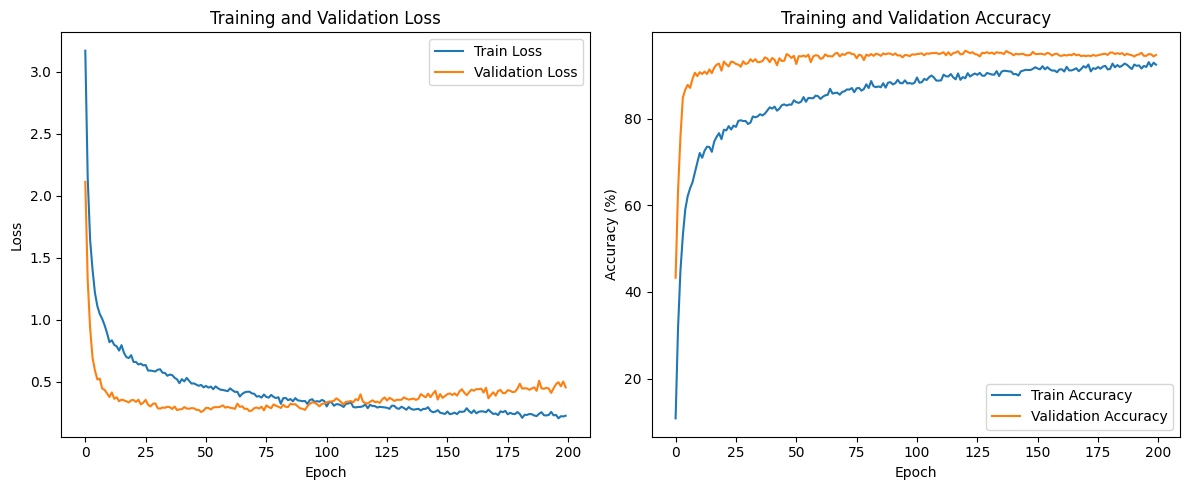

In [43]:
plt.figure(figsize=(12, 5))

# ---- loss ----
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# ---- accuracy ----
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

📊 測試損失: 0.1570, 測試準確率: 95.12%
⏳ 平均每筆資料推論時間: 0.0137 毫秒


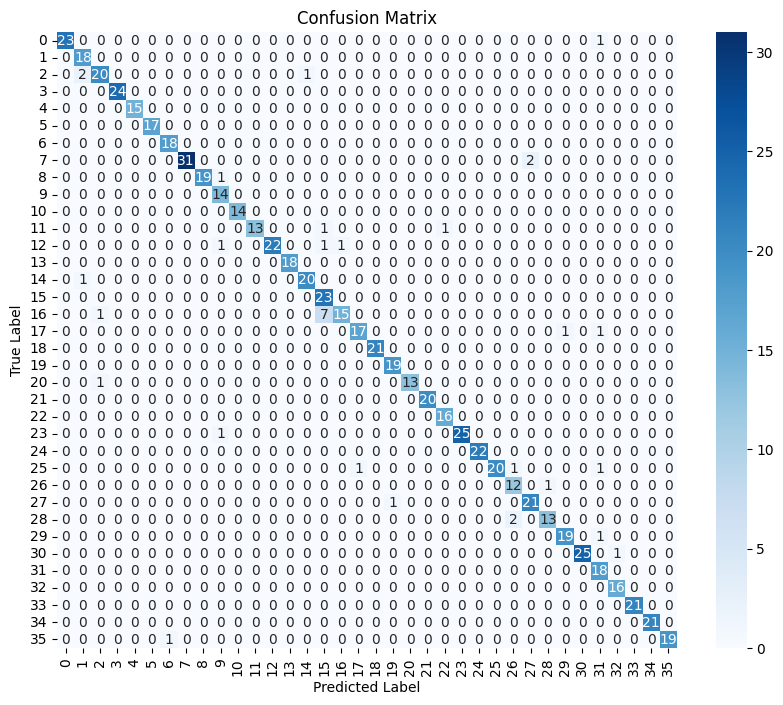

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import time

# 載入最佳模型
model.load_state_dict(torch.load("/media/mcs/1441ae67-d7cd-43e6-b028-169f78661a2f/kyle/csi_tool/model_CNN/models_save/best_model(mirco)0303-amp+phase.pth"))
model.eval()

# 測試模型
test_loss = 0.0
correct = 0
total = 0
all_labels = []
all_predictions = []
total_time = 0  # 用來累積測試時間

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 記錄開始時間
        torch.cuda.synchronize()  # 確保 GPU 所有計算同步
        start_time = time.perf_counter()

        outputs = model(inputs)  # 進行推論

        torch.cuda.synchronize()  # 確保 GPU 完成推論
        end_time = time.perf_counter()
        
        batch_time = end_time - start_time  # 計算批次時間
        total_time += batch_time  # 累積總時間

        # 計算 Loss
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        test_loss += loss.item() * inputs.size(0)

        # 預測結果
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

        # 儲存真實標籤與預測標籤
        all_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# 計算最終測試損失與準確率
test_loss /= len(test_loader.dataset)
accuracy = 100 * correct / total

# 計算平均每筆資料的推論時間
num_samples = len(test_loader.dataset)
avg_inference_time = total_time / num_samples

print(f"📊 測試損失: {test_loss:.4f}, 測試準確率: {accuracy:.2f}%")
print(f"⏳ 平均每筆資料推論時間: {avg_inference_time * 1000:.4f} 毫秒")


# 計算 Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)

# 畫出 Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(36), yticklabels=range(36))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [30]:
#0618

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time

# 損失函數
criterion = nn.CrossEntropyLoss()

# 優化器
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 學習率調整器
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=15, verbose=True)

# 其它參數
epochs = 200
patience = 20    # Early stopping patience
counter = 0
best_val_loss = float('inf')
best_model_path = "./models_save/best_model(mirco)0309-amp_0618.pth"

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    start_time = time.perf_counter()
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        train_correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_acc = 100 * train_correct / total_train

    # ---- 驗證階段 ----
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            val_correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = 100 * val_correct / total_val

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # 學習率調整（這行很重要要放在epoch後！）
    scheduler.step(avg_val_loss)

    epoch_time = time.perf_counter() - start_time
    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}% | "
          f"Time: {epoch_time:.2f} sec")

    # Early stopping & 儲存最佳模型
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ 儲存最佳模型 (Val Loss: {best_val_loss:.4f}) 至 {best_model_path}")
        counter = 0
    else:
        counter += 1
        print(f"Early stop counter: {counter}/{patience}")

    if counter >= patience:
        print(f"🛑 Early stop at epoch {epoch+1}")
        break

print("訓練完成！")


/home/mcs/anaconda3/envs/kyle_ai/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/200] | Train Loss: 1.3689 | Train Acc: 57.32% | Val Loss: 0.2693 | Val Acc: 96.00% | Time: 0.95 sec
✅ 儲存最佳模型 (Val Loss: 0.2693) 至 ./models_save/best_model(mirco)0309-amp_0618.pth
Epoch [2/200] | Train Loss: 0.3946 | Train Acc: 87.08% | Val Loss: 0.0945 | Val Acc: 97.97% | Time: 0.85 sec
✅ 儲存最佳模型 (Val Loss: 0.0945) 至 ./models_save/best_model(mirco)0309-amp_0618.pth
Epoch [3/200] | Train Loss: 0.2561 | Train Acc: 91.55% | Val Loss: 0.0657 | Val Acc: 99.14% | Time: 0.82 sec
✅ 儲存最佳模型 (Val Loss: 0.0657) 至 ./models_save/best_model(mirco)0309-amp_0618.pth
Epoch [4/200] | Train Loss: 0.1934 | Train Acc: 93.77% | Val Loss: 0.0492 | Val Acc: 99.25% | Time: 0.82 sec
✅ 儲存最佳模型 (Val Loss: 0.0492) 至 ./models_save/best_model(mirco)0309-amp_0618.pth
Epoch [5/200] | Train Loss: 0.1576 | Train Acc: 94.72% | Val Loss: 0.0424 | Val Acc: 99.17% | Time: 0.82 sec
✅ 儲存最佳模型 (Val Loss: 0.0424) 至 ./models_save/best_model(mirco)0309-amp_0618.pth
Epoch [6/200] | Train Loss: 0.1377 | Train Acc: 95.62% | Val

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

all_true = []
all_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:  # 這裡改 test_loader
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        # 預測
        _, predicted = torch.max(outputs, 1)
        all_true.extend(torch.argmax(labels, dim=1).cpu().numpy())
        all_pred.extend(predicted.cpu().numpy())

# 確保 all_true, all_pred 是 1D 整數 array
all_true = np.array(all_true)
all_pred = np.array(all_pred)

# 準確率
test_acc = 100 * np.mean(all_true == all_pred)
print(f"Test Accuracy: {test_acc:.2f}%")

# 混淆矩陣
# cm = confusion_matrix(all_true, all_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap="Blues", xticks_rotation=45)
# plt.title(f"Test Confusion Matrix (Acc={test_acc:.2f}%)")
# plt.show()


Test Accuracy: 99.83%


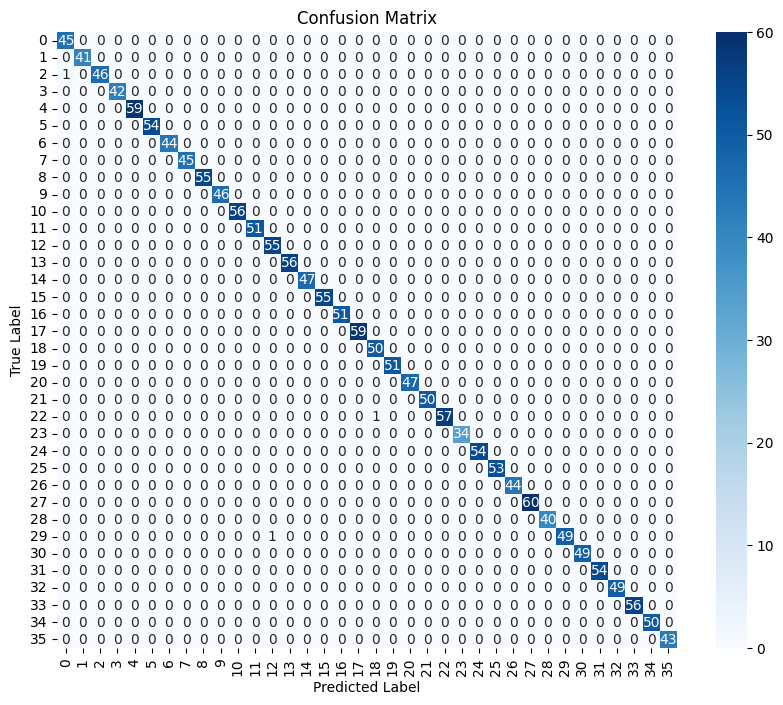

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_true, all_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(36), yticklabels=range(36))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

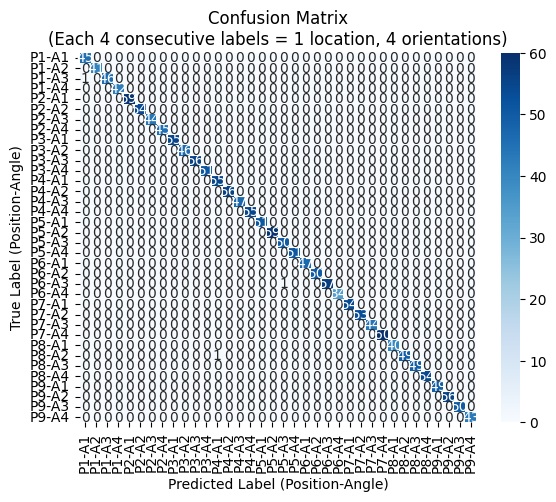

In [58]:
num_pos = 9   # 假設 36/4=9
num_angle = 4

# 產生 label 名稱
label_names = [f"P{p+1}-A{a+1}" for p in range(num_pos) for a in range(num_angle)]

# 畫圖
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label (Position-Angle)")
plt.ylabel("True Label (Position-Angle)")
plt.title("Confusion Matrix\n(Each 4 consecutive labels = 1 location, 4 orientations)")
plt.show()


In [57]:
# all_true, all_pred 已經收集好
all_true = np.array(all_true)
all_pred = np.array(all_pred)
accuracy = 100 * np.mean(all_true == all_pred)
print(f"test Accuracy: {accuracy:.2f}%")



test Accuracy: 99.83%


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 假設你的資料已經分好
# X_train, y_train, X_val, y_val, X_test, y_test
# y 需為 class index（一維，非one-hot）

# 1. 訓練KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights="uniform")  # 使用歐氏距離
knn.fit(amp_train, y_train)

# 2. 驗證集評估 (選超參/做比較)
y_val_pred = knn.predict(amp_val)
val_acc = 100 * accuracy_score(y_val, y_val_pred)
print(f"KNN Validation Accuracy: {val_acc:.2f}%")

# 3. 測試集最終評估 (僅報一次)
y_test_pred = knn.predict(amp_test)
test_acc = 100 * accuracy_score(y_test, y_test_pred)
print(f"KNN Test Accuracy: {test_acc:.2f}%")

# # 4. 畫混淆矩陣（以驗證集為例，你也可以畫測試集的）
# cm = confusion_matrix(y_val, y_val_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap="Blues", xticks_rotation=45)
# plt.title(f"KNN Confusion Matrix (Val Acc={val_acc:.2f}%)")
# plt.show()


KNN Validation Accuracy: 99.17%
KNN Test Accuracy: 99.06%


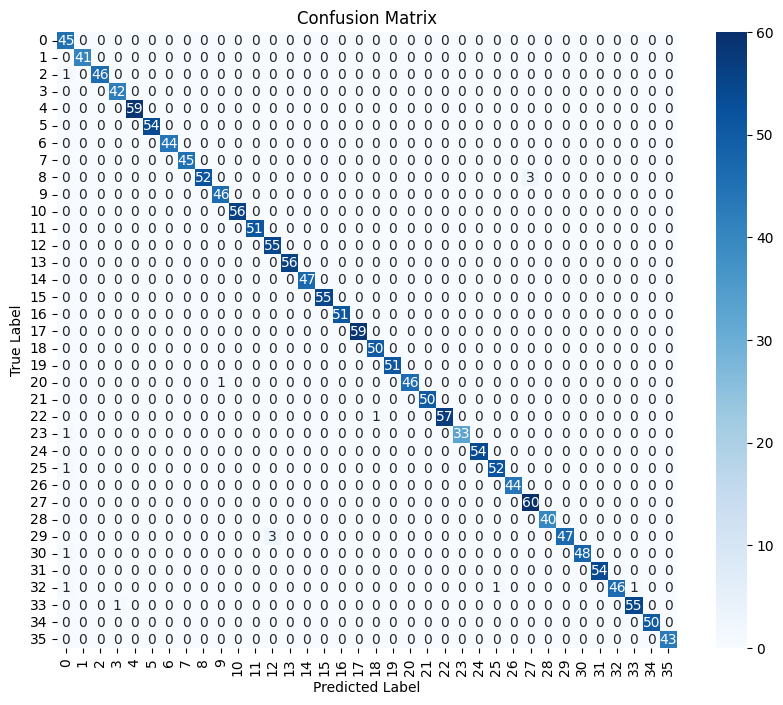

In [60]:
import seaborn as sns

# 若y_test, y_test_pred是one-hot, 先轉index
y_test_idx = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
y_test_pred_idx = y_test_pred if len(y_test_pred.shape) == 1 else np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_test_idx, y_test_pred_idx)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
